# Subjective Verbs

This notebook seeks to merge ideas in the 2 SV pair notebooks.

<div class="alert alert-block alert-info"> 
    <p>A note about the naming of variables below:</p>
    <ul>
        <li><code>m</code> and <code>w</code> represent the subcorpus, men or women speakers</li>
        <li><code>pp</code> stands for personal pronouns, usually "he," "she," and "I" here.
        <li><code>svo</code> signifies that the complete SVO-triplet is used</li>
        <li><code>sv</code> signifies that just the subject-verb pairs are being used</li>
    </ul>   
</div>

What we want to explore is both the usual ways that speakers (men or women) pair the pronouns *he*, *she*, *i* with verbs and also, perhaps, the significant pairings. The usual way can be approached via **counts**, which we have visualized in a separate notebook with Sankey plots.

Relative frequencies would let us compare across the two subcorpora ... or would this be approached better by some form of TF-IDF? (And would we need to determine some sort of lower threshold of the number of sentences in which a verb must occur? We're not interested in verb only used in a single sentence but verbs used often in a pairing in one subcorpus and not in the other.)

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATAFRAMES
# the `lem` suffix indicates the verbs have been lemmatized
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

# Save the SVO count for each corpus for calculating relative frequencies
m_svo_count = svos_m.shape[0]
w_svo_count = svos_w.shape[0]

# Output something to check our efforts
print(m_svo_count, w_svo_count)

80460 26610


## SV Pairs with "She", "He", and "I"

In [2]:
# Create a list of the pronouns we want to see
pronouns = ["he", "she", "i"]

def ppvPairs (df, pplist):    
    # And then count the number of times 
    # those pronouns are paired with particular verbs
    temp = df[df["subject"].isin(
        pplist)].value_counts(
        subset=['subject', 'verb']).reset_index()
    # Re-label the new column from "0" to something human-readable
    temp.rename(columns={0:'v_freq'}, inplace=True)
    # Add a column with relative frequency
    temp['v_rfreq'] = temp['v_freq'] / df.shape[0]
    return temp

In [3]:
m_pp_v = ppvPairs(svos_m, pronouns)
w_pp_v = ppvPairs(svos_w, pronouns)

print(m_pp_v.shape)
print(w_pp_v.shape)

# m_pp_v.to_csv("../output/m_pp_v.csv")
# w_pp_v.to_csv("../output/w_pp_v.csv")

(1723, 4)
(1069, 4)


## Subjects as Verb Features

In the cells below, we … 

1. **create 6 distinct dataframes**, one each for men and women speakers and the three pronouns.
2. **transpose each "subjective" dataframe** into a single row with the verbs associated with as columns and their relative frequencies as values.
3. **stack those rows** to get a unified dataframe with all 6 subject positions and verbs associated with them.
4. **transpose unified dataframe** to have the features as rows and the speaker-pronoun documents as columns (so we can do some math on the features). I.e., `verbs` dataframe below.

<div class="alert alert-block alert-warning">    
    <p>There is a lot of repetition here. No doubt there are not only better ways to do this in terms of individual lines of code but also without as many lines of repetitious code as there are here.</p>
    </div>

<div class="alert alert-block alert-info">
**NOTE**: Possible threshold 0.002 (0.2%) frequency represents at least 38 occurrences in the men's subcorpus and 15 in the women's.
</div>

In [4]:
# Filter for pronoun and drop the un-needed columns
m_he = m_pp_v.loc[(m_pp_v['subject'] == 'he')].drop(columns=["subject","v_rfreq"])
w_he = w_pp_v.loc[(w_pp_v['subject'] == 'he')].drop(columns=["subject","v_rfreq"])

# Repeat for "she"
m_she = m_pp_v.loc[(m_pp_v['subject'] == 'she')].drop(columns=["subject","v_rfreq"])
w_she = w_pp_v.loc[(w_pp_v['subject'] == 'she')].drop(columns=["subject","v_rfreq"])

# Repeat for "i"
m_i = m_pp_v.loc[(m_pp_v['subject'] == 'i')].drop(columns=["subject","v_rfreq"])
w_i = w_pp_v.loc[(w_pp_v['subject'] == 'i')].drop(columns=["subject","v_rfreq"])

# Print results
print(f"m_he:  {m_he.shape[0]}, w_he:  {w_he.shape[0]}")
print(f"m_she: {m_she.shape[0]}, w_she: {w_she.shape[0]}")
print(f"m_i:   {m_i.shape[0]}, w_i:   {w_i.shape[0]}")
print("\n w_i looks like:")
print(w_i.head())

m_he:  514, w_he:  246
m_she: 245, w_she: 221
m_i:   964, w_i:   602

 w_i looks like:
   verb  v_freq
0  have     586
1  want     424
2    go     330
3    do     226
4   get     203


In [5]:
def makestackable (df, indexname):
    df_T = df.transpose()
    df_T.columns = df_T.iloc[0]
    df_T.drop(index=df_T.index[0], axis=0, inplace=True)
    df_T.index = [indexname]
    return df_T

In [6]:
m_it = makestackable(m_i, "m_i")
w_it = makestackable(w_i, "w_i")
m_het = makestackable(m_he, "m_he")
w_het = makestackable(w_he, "w_he")
m_shet = makestackable(m_she, "m_she")
w_shet = makestackable(w_she, "w_she")

In [7]:
concatenated = pd.concat([w_it, m_it, m_het, w_het, m_shet, w_shet])
concatenated.fillna(0, inplace=True)
concatenated.head(6)

verb,have,want,go,do,get,tell,like,know,start,love,...,exsanguinates,circumcise,address,brainwash,murmur,partner,prioritize,lie,limit,lure
w_i,586,424,330,226,203,169,160,154,145,137,...,0,0,0,0,0,0,0,0,0,0
m_i,1318,1210,1076,650,586,326,462,274,377,271,...,0,0,0,0,0,0,0,0,0,0
m_he,232,71,78,111,90,58,14,27,42,5,...,0,0,0,0,0,0,0,0,0,0
w_he,80,20,32,29,19,16,7,4,12,4,...,0,0,0,0,0,0,0,0,0,0
m_she,94,32,34,41,24,20,5,10,17,4,...,0,0,0,0,0,0,0,0,0,0
w_she,63,11,22,33,20,18,6,6,9,10,...,1,1,1,1,1,1,1,1,1,1


In [8]:
verbs = concatenated.transpose()
print(verbs.shape)
verbs.head()

(1381, 6)


,w_i,m_i,m_he,w_he,m_she,w_she
verb,,,,,,
have,586,1318,232,80,94,63
want,424,1210,71,20,32,11
go,330,1076,78,32,34,22
do,226,650,111,29,41,33
get,203,586,90,19,24,20


### The TF-IDF Part

In [9]:
# get totals per verb
verbs["total"] = verbs.sum(axis = 1)

# establish that we only want to work on the counts
# for each pronoun and not the total
cols = verbs.columns
cols = list(cols)[:-1]

# the TFIDF part
for col in cols:
    verbs[col] = (1/verbs["total"])*verbs[col]
    
# let's see it
verbs

,w_i,m_i,m_he,w_he,m_she,w_she,total
verb,,,,,,,
have,0.246945,0.555415,0.097767,0.033713,0.039612,0.026549,2373
want,0.239819,0.684389,0.040158,0.011312,0.018100,0.006222,1768
go,0.209924,0.684478,0.049618,0.020356,0.021628,0.013995,1572
do,0.207339,0.596330,0.101835,0.026606,0.037615,0.030275,1090
get,0.215499,0.622081,0.095541,0.020170,0.025478,0.021231,942
...,...,...,...,...,...,...,...
partner,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
prioritize,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
lie,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1


In [10]:
verbsy = verbs.drop('total', axis=1)
verbsy.style.background_gradient(axis=None, cmap='YlGnBu')

,w_i,m_i,m_he,w_he,m_she,w_she
verb,,,,,,
have,0.246945,0.555415,0.097767,0.033713,0.039612,0.026549
want,0.239819,0.684389,0.040158,0.011312,0.018100,0.006222
go,0.209924,0.684478,0.049618,0.020356,0.021628,0.013995
do,0.207339,0.596330,0.101835,0.026606,0.037615,0.030275
get,0.215499,0.622081,0.095541,0.020170,0.025478,0.021231
tell,0.278418,0.537068,0.095552,0.026359,0.032949,0.029654
like,0.244648,0.706422,0.021407,0.010703,0.007645,0.009174
know,0.324211,0.576842,0.056842,0.008421,0.021053,0.012632
start,0.240864,0.626246,0.069767,0.019934,0.028239,0.014950


<AxesSubplot:ylabel='verb'>

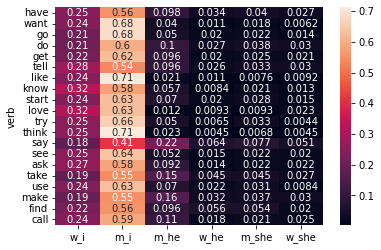

In [11]:
sns.heatmap(verbsy.head(20), annot=True)

### Weighted Class TF-IDF

[How to correctly use TF-IDF with imbalanced data — DeepwizAI](https://www.deepwizai.com/projects/how-to-correctly-use-tf-idf-with-imbalanced-data)